In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
import time 

In [17]:
training_data =[]
src_path="C:/Users/luv05/projects/Plant-Leaf-Recognition-main/data"
subclass=os.listdir(src_path)
def create_training_data():
    for sclass in subclass:
        path=os.path.join(src_path,sclass)
        class_num=subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (224,224))
            training_data.append([new_array,class_num])
            
create_training_data()
print(len(training_data))

100%|██████████| 75/75 [00:01<00:00, 41.25it/s]

1125


In [18]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,224,224,1)
print(X[0])

[[[246]
  [247]
  [244]
  ...
  [242]
  [243]
  [241]]

 [[247]
  [246]
  [246]
  ...
  [243]
  [242]
  [242]]

 [[246]
  [245]
  [245]
  ...
  [242]
  [238]
  [242]]

 ...

 [[252]
  [253]
  [252]
  ...
  [247]
  [247]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [247]
  [249]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [248]
  [248]
  [246]]]


In [21]:
# Preprocessing data and pickling them for future use 
# Commented out so that preprocessing doesnt repeat on testing of various models 

import pickle 
pickle_out = open("X_Augumented_Grayscale","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_Augumented_Grayscale","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [22]:
# Model 1
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format("Basic_CNN_2_Augumented"))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
900/900 [==============================] - 94s 104ms/step - loss: 2.2522 - accuracy: 0.2911 - val_loss: 10.4827 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 78s 86ms/step - loss: 0.7187 - accuracy: 0.7833 - val_loss: 26.7579 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 78s 87ms/step - loss: 0.1835 - accuracy: 0.9489 - val_loss: 27.1087 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 78s 87ms/step - loss: 0.0711 - accuracy: 0.9856 - val_loss: 26.9363 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 78s 86ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 47.7557 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 78s 86ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 58.8022 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 77s 86ms/step - loss: 0.0093 - accuracy: 0.9967 - v

In [23]:
#Model 2
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"

model=Sequential()

model.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
900/900 [==============================] - 12s 13ms/step - loss: 1.9553 - accuracy: 0.3167 - val_loss: 16.0237 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 12s 13ms/step - loss: 0.6935 - accuracy: 0.7378 - val_loss: 17.2281 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 12s 13ms/step - loss: 0.4361 - accuracy: 0.8344 - val_loss: 20.4750 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 12s 13ms/step - loss: 0.3207 - accuracy: 0.8867 - val_loss: 18.8500 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 12s 13ms/step - loss: 0.3217 - accuracy: 0.8811 - val_loss: 15.8321 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 12s 13ms/step - loss: 0.1795 - accuracy: 0.9322 - val_loss: 21.2895 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 12s 13ms/step - loss: 0.1802 - accuracy: 0.9389 - va

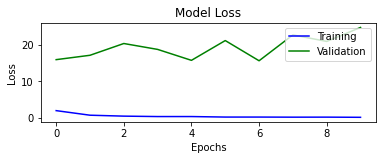

In [24]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')


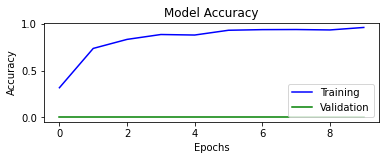

In [25]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [26]:
model.save("CNN-model")

INFO:tensorflow:Assets written to: CNN-model\assets


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 112, 100)     2600      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 100)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 100)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 250)       625250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 250)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 250)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)             

In [27]:
#Model 3
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_3"

model=Sequential()

model.add(Conv2D(32,(3,3),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15,activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])
model.summary()

Epoch 1/10
900/900 [==============================] - 12s 13ms/step - loss: 1.3834 - accuracy: 0.5178 - val_loss: 10.2999 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 11s 13ms/step - loss: 0.4610 - accuracy: 0.8333 - val_loss: 14.9431 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 11s 12ms/step - loss: 0.3173 - accuracy: 0.8911 - val_loss: 16.5089 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 12s 13ms/step - loss: 0.2906 - accuracy: 0.9000 - val_loss: 15.3146 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 12s 14ms/step - loss: 0.2183 - accuracy: 0.9167 - val_loss: 16.1680 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 14s 16ms/step - loss: 0.1664 - accuracy: 0.9411 - val_loss: 20.0911 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 13s 14ms/step - loss: 0.1918 - accuracy: 0.9378 - va

In [30]:
#Testing predictions on model
from tensorflow.keras.preprocessing import image

def prediction(img):
    img = image.img_to_array(img)
    img = img.reshape(-1, 224, 224, 1)
    img = img.astype('float32')
    img = img/255.0
    
    return np.argmax(model.predict(img),axis=-1)[0]
    
labels=["Ulmus carpinifolia","Acer","Salix aurita","Quercus","Alnus incana","Betula pubescens","Salix alba 'Sericea", "Populus tremula","Ulmus glabra","Sorbus aucuparia","Salix sinerea","Populus","Tilia","Sorbus intermedia","Fagus silvatica"]
path = "samples/1.tif"
img = image.load_img(path, target_size=(224, 224), color_mode="grayscale")
print(labels[prediction(img)])

Ulmus glabra


In [ ]:
#Model 4- ALEXNET 
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME = "AlexNet_Model"

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=256, input_shape=X.shape[1:], kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384,kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
          

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y, epochs=40, batch_size=1, validation_split=0.2, callbacks=[tensorboard])
model.summary()

Epoch 1/40
164/900 [====>.........................] - ETA: 1:29 - loss: 2.6516 - accuracy: 0.0549